In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)

df['target'] = data.target

df
df.drop(['mean texture','mean perimeter',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],inplace=True,axis=1)
df

,mean radius,mean area,target
0,17.99,1001.0,0
1,20.57,1326.0,0
2,19.69,1203.0,0
3,11.42,386.1,0
4,20.29,1297.0,0
...,...,...,...
564,21.56,1479.0,0
565,20.13,1261.0,0
566,16.60,858.1,0
567,20.60,1265.0,0


### Train test Split 

#### 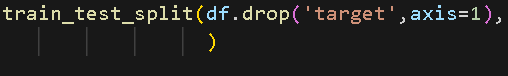
### Now You have some Questions why u drop target column ? If i give "target" column to modele then model accuracy are 100% because model have all ans 


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df.drop('target',axis=1), # this one is train data 
                                                      df['target'],
                                                      test_size=0.3,
                                                      random_state=0)
x_train.shape , x_test.shape

((398, 2), (171, 2))

## StandarScaler

##### How does 'fit()'  method  works? we give "traing data and test data" to fit to learn about the data then fit learn about data 

In [4]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

Scaler.fit(x_train) # in standard fit calculate the mean and std and store inside the scaler 

X_trained_scale = Scaler.transform(x_train)# In tranform it get data from fit and apply on the data set 
X_tested_scale = Scaler.transform(x_test)

In [5]:
Scaler.mean_

array([ 14.1855    , 661.85904523])

In [6]:
x_train

,mean radius,mean area
478,11.490,404.9
303,10.490,334.3
155,12.250,460.3
186,18.310,1041.0
101,6.981,143.5
...,...,...
277,18.810,1102.0
9,12.460,475.9
359,9.436,278.6
192,9.720,288.1


In [7]:
X_trained_scale

array([[-7.49980267e-01, -7.01886970e-01],
       [-1.02821446e+00, -8.94731787e-01],
       [-5.38522281e-01, -5.50561150e-01],
       [ 1.14757693e+00,  1.03562844e+00],
       [-2.00453824e+00, -1.41590447e+00],
       [-1.22381310e+00, -1.00344600e+00],
       [-3.07587900e-01, -3.87489825e-01],
       [-8.44579893e-01, -7.64711769e-01],
       [ 2.54445170e-01,  1.39145880e-01],
       [ 1.23661187e+00,  1.16400955e+00],
       [-6.99898113e-01, -6.71020873e-01],
       [-1.93511881e-01, -2.75497792e-01],
       [-1.60123778e-01, -2.16223960e-01],
       [-3.32628978e-01, -4.03059449e-01],
       [-1.02264978e+00, -8.95004938e-01],
       [ 1.59845544e-01,  1.86861568e-02],
       [-4.57834365e-01, -5.06856942e-01],
       [ 1.39798770e+00,  1.33882638e+00],
       [-9.55873570e-01, -8.37370014e-01],
       [-1.11724940e+00, -9.55917678e-01],
       [ 1.13088288e+00,  1.03289693e+00],
       [-3.29846636e-01, -3.88036127e-01],
       [-9.19703125e-01, -8.27536567e-01],
       [-1.

In [8]:
X_trained_scale = pd.DataFrame(X_trained_scale , columns=x_train.columns)
X_tested_scale = pd.DataFrame(X_tested_scale,columns=x_test.columns)

In [9]:
X_tested_scale

,mean radius,mean area
0,-0.218553,-0.287243
1,-0.271417,-0.338596
2,-0.046048,-0.151214
3,0.020728,-0.078556
4,-0.321500,-0.377110
...,...,...
166,-0.132300,-0.229335
167,1.058542,0.900965
168,-0.132300,-0.248183
169,-0.246376,-0.316197


In [10]:
np.round(x_train.describe(),1)

,mean radius,mean area
count,398.0,398.0
mean,14.2,661.9
std,3.6,366.6
min,7.0,143.5
25%,11.7,420.4
50%,13.3,548.4
75%,15.8,779.1
max,28.1,2501.0


In [11]:
np.round(X_trained_scale.describe(),1)


,mean radius,mean area
count,398.0,398.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-1.4
25%,-0.7,-0.7
50%,-0.2,-0.3
75%,0.4,0.3
max,3.9,5.0


## Effict of Scaling 

Text(0.5, 1.0, 'After')

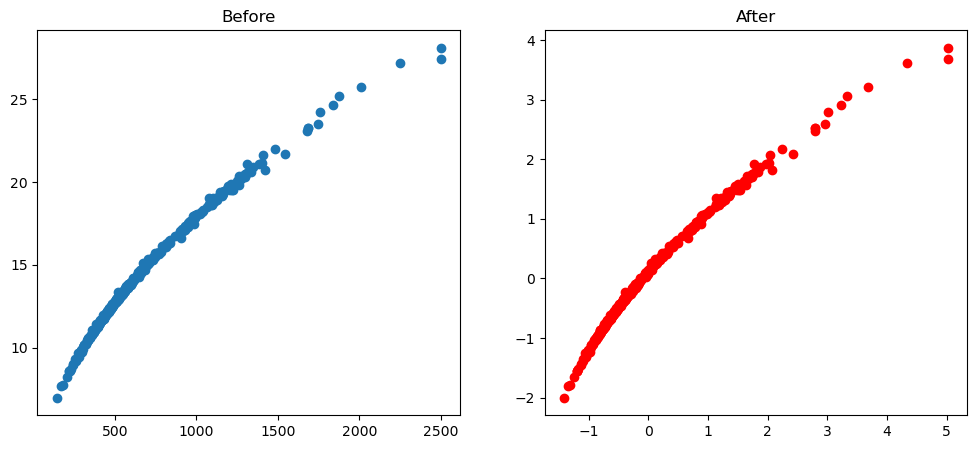

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(x_train['mean area'],x_train['mean radius'])
ax1.set_title('Before')
ax2.scatter(X_trained_scale['mean area'],X_trained_scale['mean radius'],color='red')
ax2.set_title('After')

<Axes: title={'center': 'After Scaling'}, xlabel='mean area', ylabel='Density'>

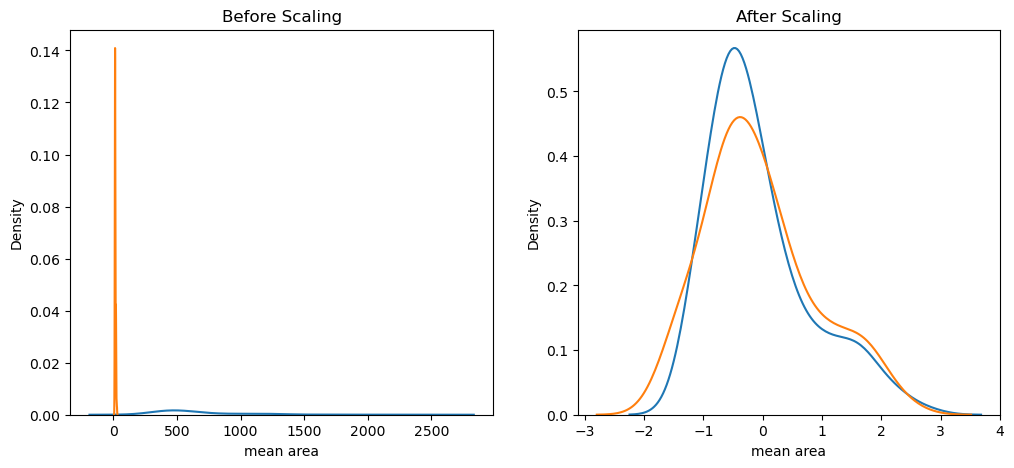

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['mean area'], ax=ax1)
sns.kdeplot(x_train['mean radius'], ax=ax1)

#After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_tested_scale['mean area'],ax=ax2)
sns.kdeplot(X_tested_scale['mean radius'],ax=ax2)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr_scale = LogisticRegression()

In [16]:
lr.fit(x_train,y_train)
lr_scale.fit(X_trained_scale,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = lr.predict(x_test)
y_pred_scale = lr_scale.predict(X_tested_scale)

In [18]:
from sklearn.metrics import accuracy_score


##### why i get same accuracy_score ? Ans is 1 side you give same data to predect in y_pred another side you give big data to predect that is scaled data then accuracy are the same

In [19]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scale))

Actual 0.9005847953216374
Scaled 0.9005847953216374


In [20]:
x_train

,mean radius,mean area
478,11.490,404.9
303,10.490,334.3
155,12.250,460.3
186,18.310,1041.0
101,6.981,143.5
...,...,...
277,18.810,1102.0
9,12.460,475.9
359,9.436,278.6
192,9.720,288.1


In [21]:
y_test

512    0
457    1
439    1
298    1
37     1
      ..
7      0
408    0
523    1
361    1
553    1
Name: target, Length: 171, dtype: int64

In [22]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [23]:
print("Unscaled coefficients:")
print(lr.coef_)
print("\nScaled coefficients:")
print(lr_scale.coef_)

Unscaled coefficients:
[[ 0.39335046 -0.01533295]]

Scaled coefficients:
[[-1.65139839 -1.78868585]]
